In [1]:
import pickle

import optuna
import optuna.visualization as vis

In [2]:
# study_name = "study-0506-190624"
# study_name = "study-0502-175711"
study_name = "study-0428"
storage = f"sqlite:///Data/{study_name}/Data/seg-study.db"
studies = optuna.study.get_all_study_summaries(storage=storage)
print("Num of studies:", len(studies))
study = studies[-1]
print(study.study_name)

try:
    with open(f"Data/{study_name}/Data/studies/{study.study_name}.pkl", "rb") as f:
        study_dict = pickle.load(f)

    study = optuna.load_study(
        study_name=study.study_name,
        storage=storage,
        sampler=study_dict["sampler"],
        pruner=study_dict["pruner"],
    )
except FileNotFoundError:
    study = optuna.load_study(study_name=study.study_name, storage=storage)
study.best_value, len(study.trials), study.pruner, study.best_params

Num of studies: 11
study-0428-165206


(0.15075820684432983,
 29,
 {'flip_prob': 0.22710206874032077,
  'rotate_prob': 0.5428726152618017,
  'elastic_prob': 0.4650293204157144,
  'translate_prob': 0.5133158088820531,
  'brightness_prob': 0.22329210994988455,
  'batch_size': 8,
  'dropout_p': 0.2993426332977101,
  'vanilla_loss': False,
  'loss_w0': 6.448921707211469,
  'loss_sigma': 8.374976962770637,
  'loss_w1': 4.956609462539272,
  'use_adam': True,
  'lr': 0.00042799813490662517,
  'use_cosine_scheduler': False,
  'min_lr': 1.1305653886054639e-08,
  'lr_patience': 18,
  'lr_cooldown': 5,
  'lr_factor': 0.05994461330037832})

In [16]:
for trial in study.trials:
    params = trial.params
    if not params["vanilla_loss"]:
        v = trial.value
        if v and v < 0.25:
            print(f"{v:0.3f}", trial.number, trial.params, trial.state)

0.151 6 {'flip_prob': 0.22710206874032077, 'rotate_prob': 0.5428726152618017, 'elastic_prob': 0.4650293204157144, 'translate_prob': 0.5133158088820531, 'brightness_prob': 0.22329210994988455, 'batch_size': 8, 'dropout_p': 0.2993426332977101, 'vanilla_loss': False, 'loss_w0': 6.448921707211469, 'loss_sigma': 8.374976962770637, 'loss_w1': 4.956609462539272, 'use_adam': True, 'lr': 0.00042799813490662517, 'use_cosine_scheduler': False, 'min_lr': 1.1305653886054639e-08, 'lr_patience': 18, 'lr_cooldown': 5, 'lr_factor': 0.05994461330037832} TrialState.COMPLETE
0.218 8 {'flip_prob': 0.4313526353435754, 'rotate_prob': 0.5195177074975587, 'elastic_prob': 0.32700822726181755, 'translate_prob': 0.12742941175772288, 'brightness_prob': 0.42366340115700113, 'batch_size': 10, 'dropout_p': 0.3504827301295488, 'vanilla_loss': False, 'loss_w0': 1.8080122449304208, 'loss_sigma': 8.591290764404784, 'loss_w1': 1.2182693112161689, 'use_adam': True, 'lr': 0.00010434565593825852, 'use_cosine_scheduler': Fals

In [17]:
optuna.importance.get_param_importances(study)

{'dropout_p': np.float64(0.2113420847830501),
 'brightness_prob': np.float64(0.19925115549570316),
 'use_adam': np.float64(0.16311114064807108),
 'min_lr': np.float64(0.10552428811318859),
 'flip_prob': np.float64(0.10386092748486696),
 'rotate_prob': np.float64(0.07506660634900551),
 'elastic_prob': np.float64(0.0676054716301777),
 'translate_prob': np.float64(0.03630069552328497),
 'batch_size': np.float64(0.022194364702368668),
 'vanilla_loss': np.float64(0.01038559929407271),
 'use_cosine_scheduler': np.float64(0.005357665976210604)}

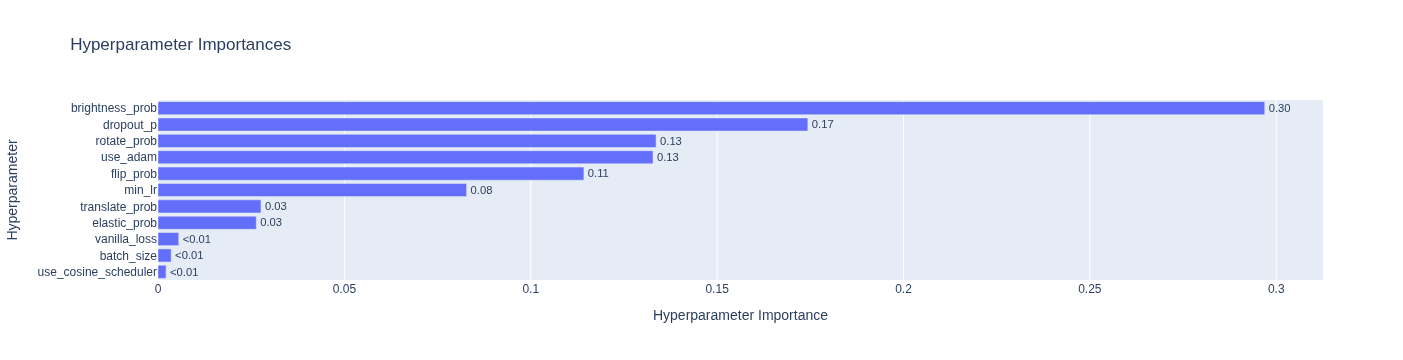

In [18]:
vis.plot_param_importances(study)